# Diabetes Prediction Using Machine Learning

### * Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

### * Importing the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\david\OneDrive\Desktop\diabetes.csv")

### * Viewing the Data

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### * Information about the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### * Statistics of the Dataset

In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
df.shape

(768, 9)

### * Checking the Null Values

In [7]:
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

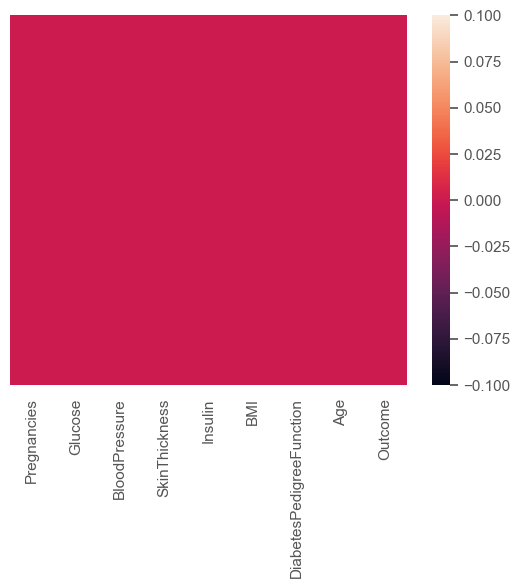

In [9]:
sns.heatmap(df.isnull(), yticklabels=False)

### * Replacing the 0's with NaN Values

In [10]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

In [11]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

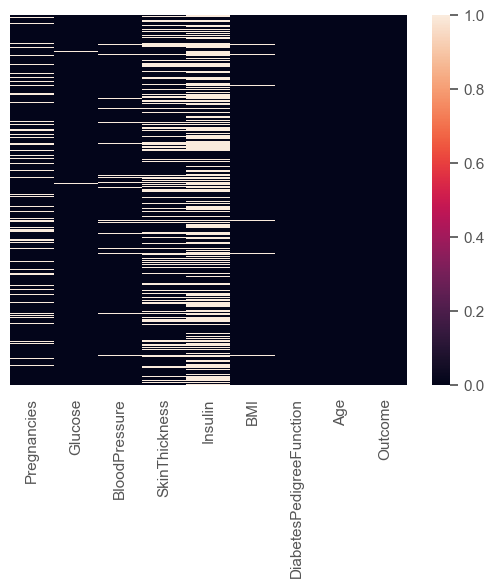

In [13]:
sns.heatmap(df.isnull(), yticklabels=False)

### * Replacing the NaN Values with the Mean Values

In [14]:
df[('Insulin')] = df[('Insulin')].replace(np.NaN,df.Insulin.mean()) 
df[('Pregnancies')] = df[('Pregnancies')].replace(np.NaN,df.Pregnancies.mean()) 
df[('Glucose')] = df[('Glucose')].replace(np.NaN,df.Glucose.mean()) 
df[('BloodPressure')] = df[('BloodPressure')].replace(np.NaN,df.BloodPressure.mean()) 
df[('SkinThickness')] = df[('SkinThickness')].replace(np.NaN,df.SkinThickness.mean()) 
df[('BMI')] = df[('BMI')].replace(np.NaN,df.BMI.mean()) 

In [15]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0       35.00000  155.548223  33.6   
1       1.000000     85.0           66.0       29.00000  155.548223  26.6   
2       8.000000    183.0           64.0       29.15342  155.548223  23.3   
3       1.000000     89.0           66.0       23.00000   94.000000  28.1   
4       4.494673    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0       48.00000  180.000000  32.9   
764     2.000000    122.0           70.0       27.00000  155.548223  36.8   
765     5.000000    121.0           72.0       23.00000  112.000000  26.2   
766     1.000000    126.0           60.0       29.15342  155.548223  30.1   
767     1.000000     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### * Identifying the Outliers and Removing them using Interquartile ranges and Viewing them with BoxPlot

In [17]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

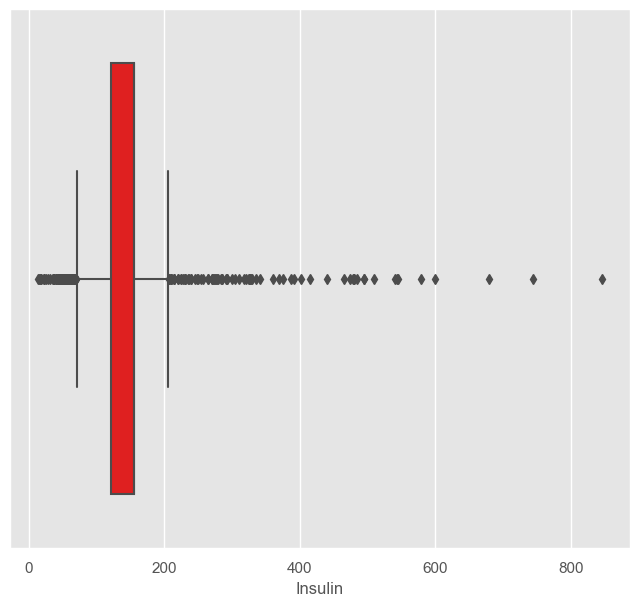

In [18]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

<Axes: xlabel='Insulin'>

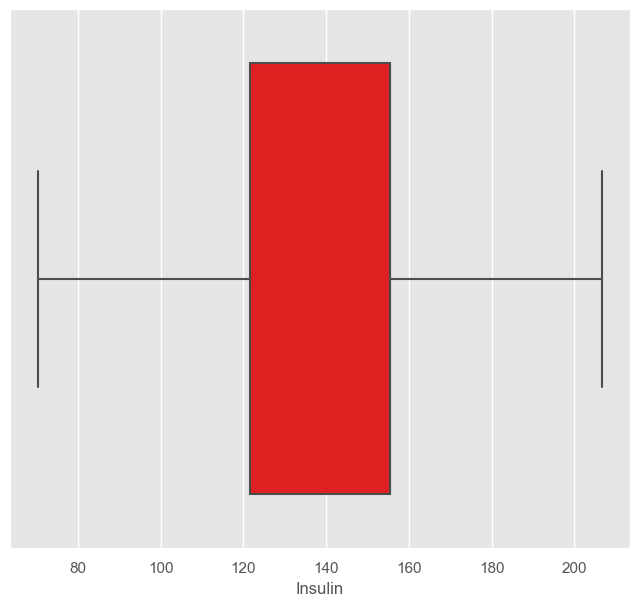

In [19]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper
df.loc[df['Insulin']<lower, "Insulin"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

<Axes: xlabel='Pregnancies'>

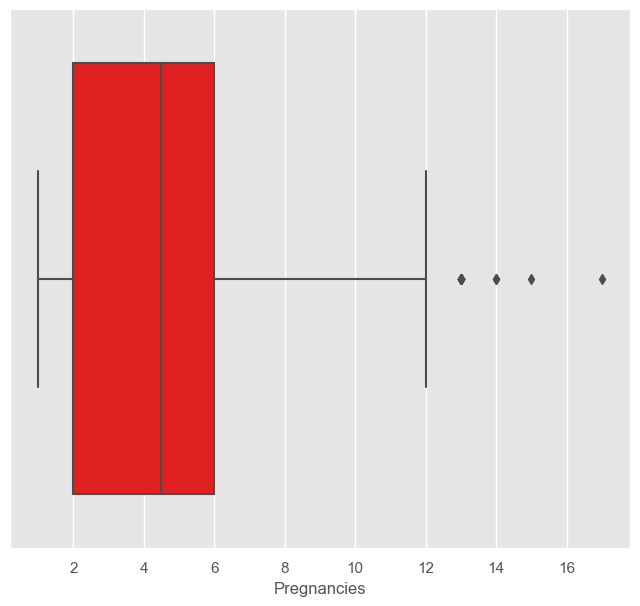

In [20]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

<Axes: xlabel='Pregnancies'>

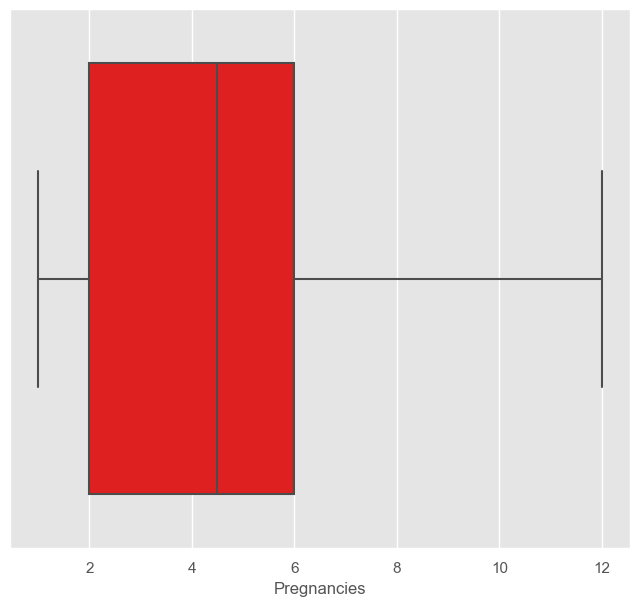

In [21]:
Q1 = df.Pregnancies.quantile(0.25)
Q3 = df.Pregnancies.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Pregnancies']>upper, "Pregnancies"] = upper
df.loc[df['Pregnancies']<lower, "Pregnancies"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

<Axes: xlabel='BloodPressure'>

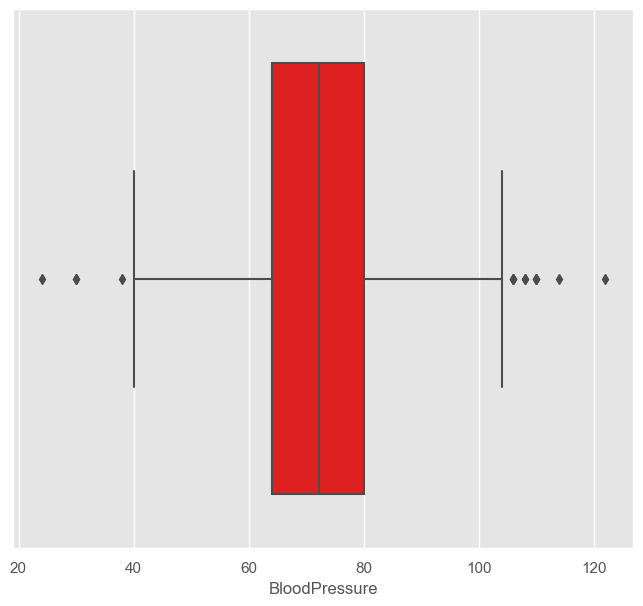

In [22]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BloodPressure"], color="red")

<Axes: xlabel='BloodPressure'>

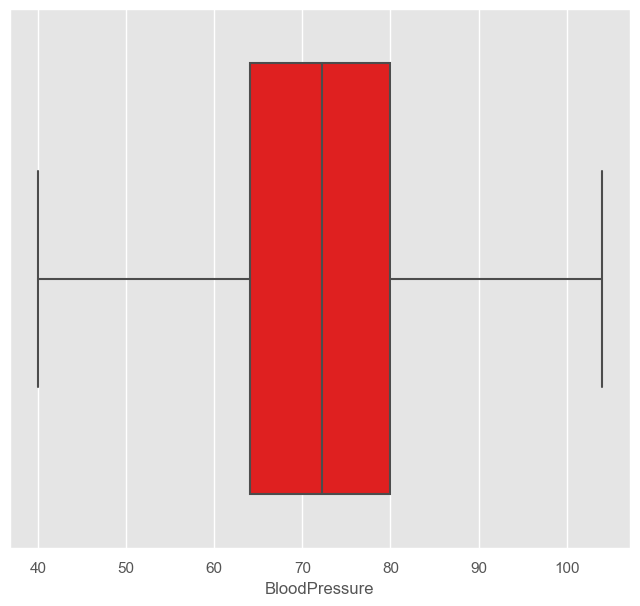

In [23]:
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['BloodPressure']>upper, "BloodPressure"] = upper
df.loc[df['BloodPressure']<lower, "BloodPressure"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BloodPressure"], color="red")

<Axes: xlabel='SkinThickness'>

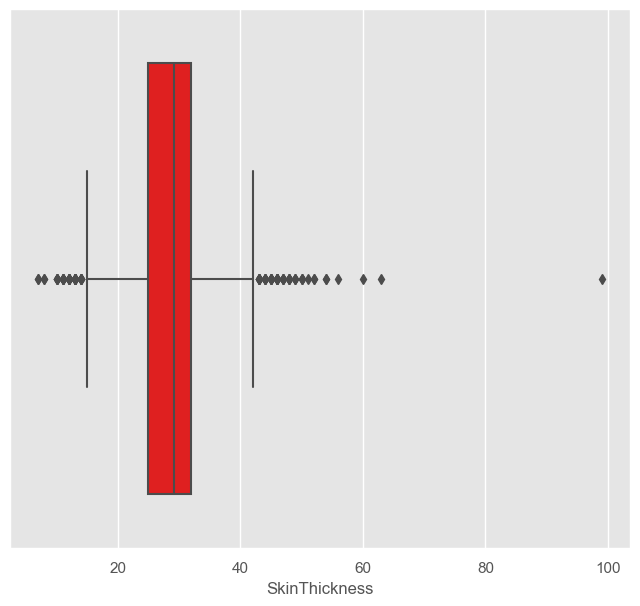

In [24]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["SkinThickness"], color="red")

<Axes: xlabel='SkinThickness'>

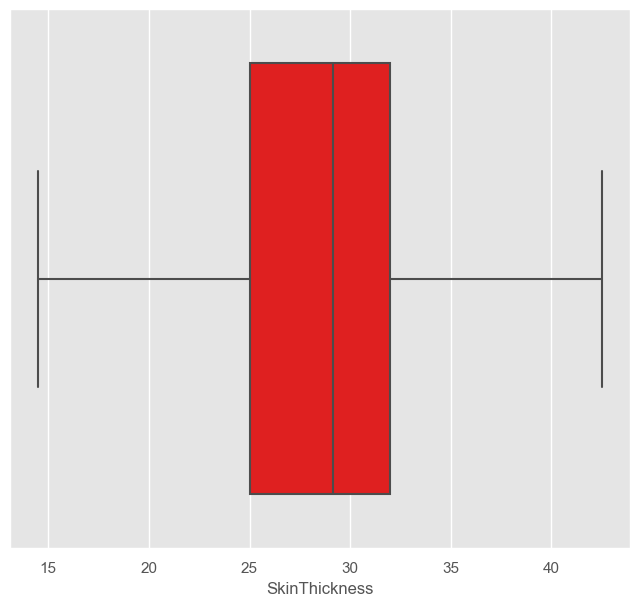

In [25]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['SkinThickness']>upper, "SkinThickness"] = upper
df.loc[df['SkinThickness']<lower, "SkinThickness"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["SkinThickness"], color="red")

<Axes: xlabel='BMI'>

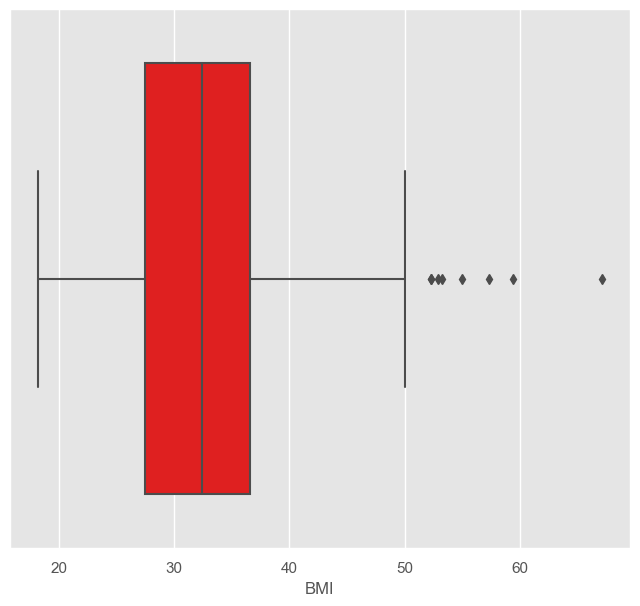

In [26]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BMI"], color="red")

<Axes: xlabel='BMI'>

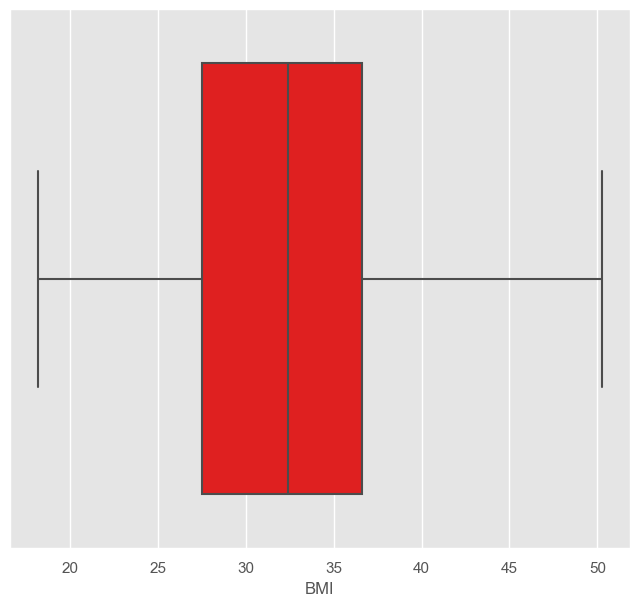

In [27]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['BMI']>upper, "BMI"] = upper
df.loc[df['BMI']<lower, "BMI"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BMI"], color="red")

<Axes: xlabel='DiabetesPedigreeFunction'>

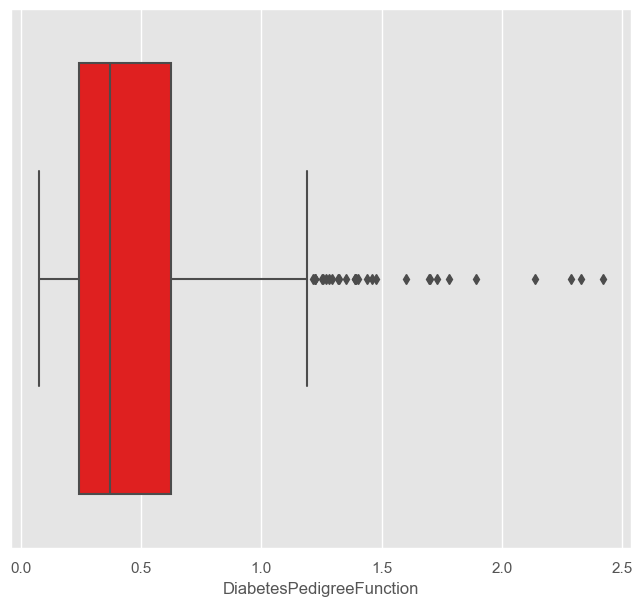

In [28]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["DiabetesPedigreeFunction"], color="red")

<Axes: xlabel='DiabetesPedigreeFunction'>

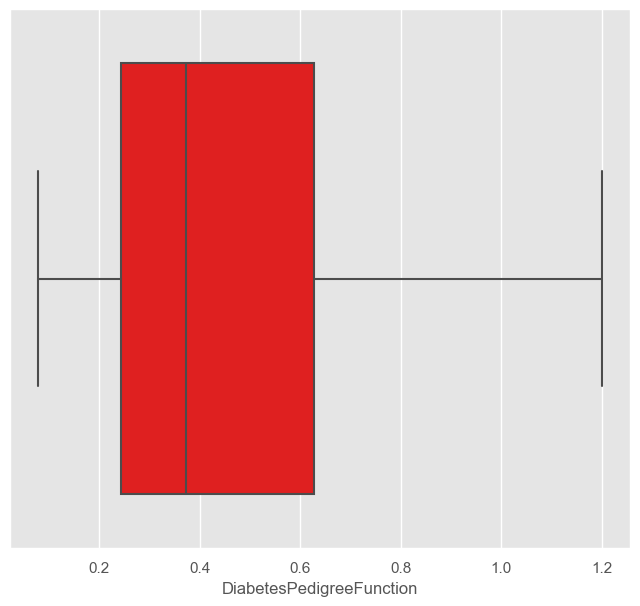

In [29]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['DiabetesPedigreeFunction']>upper, "DiabetesPedigreeFunction"] = upper
df.loc[df['DiabetesPedigreeFunction']<lower, "DiabetesPedigreeFunction"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["DiabetesPedigreeFunction"], color="red")

<Axes: xlabel='Age'>

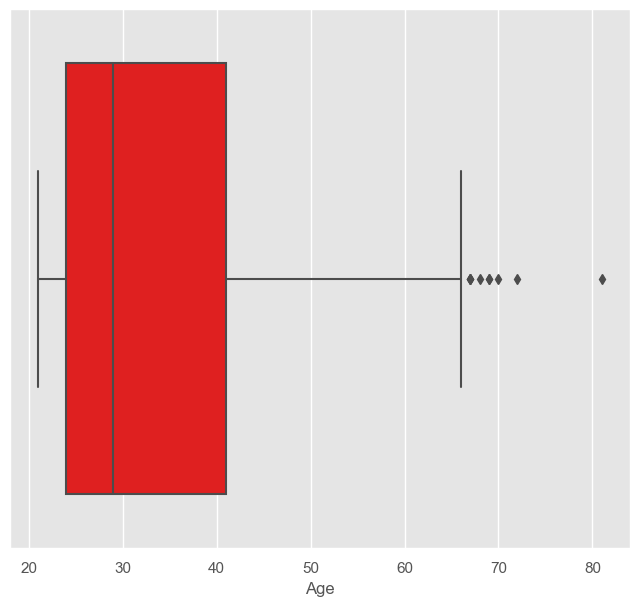

In [30]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Age"], color="red")

<Axes: xlabel='Age'>

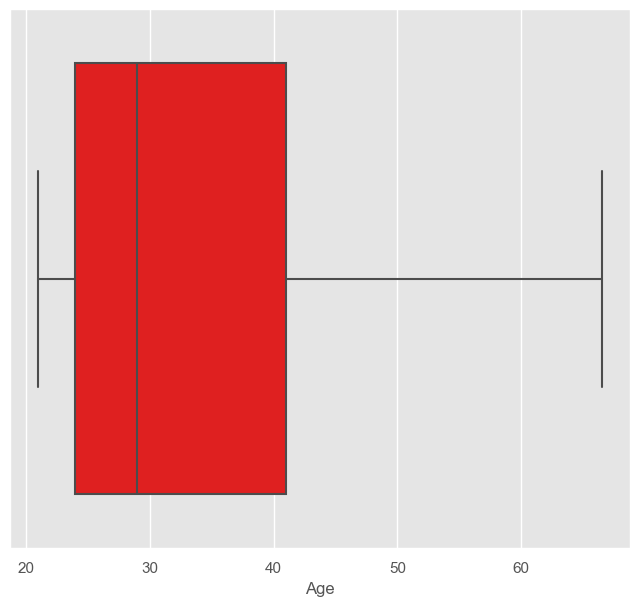

In [31]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Age']>upper, "Age"] = upper
df.loc[df['Age']<lower, "Age"] = lower
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Age"], color="red")

## Visualising Data Using Various Graphs

In [32]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

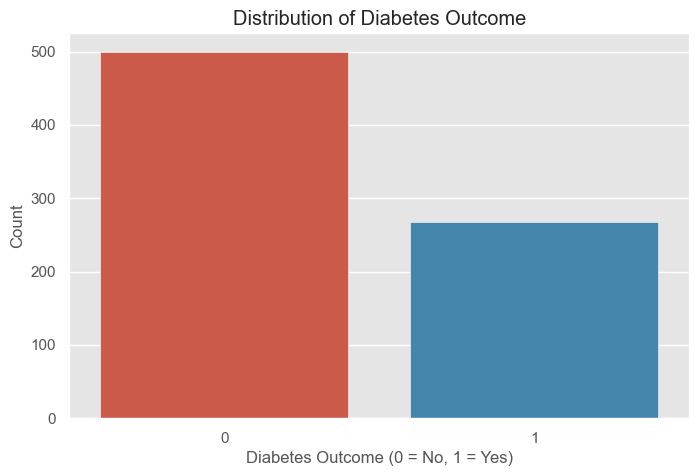

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

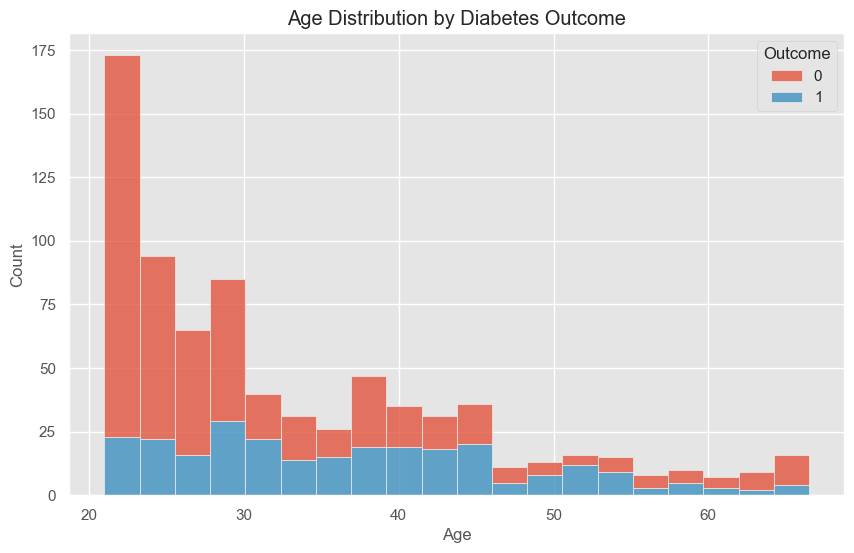

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Outcome', multiple='stack', bins=20)
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'SkinThickness')

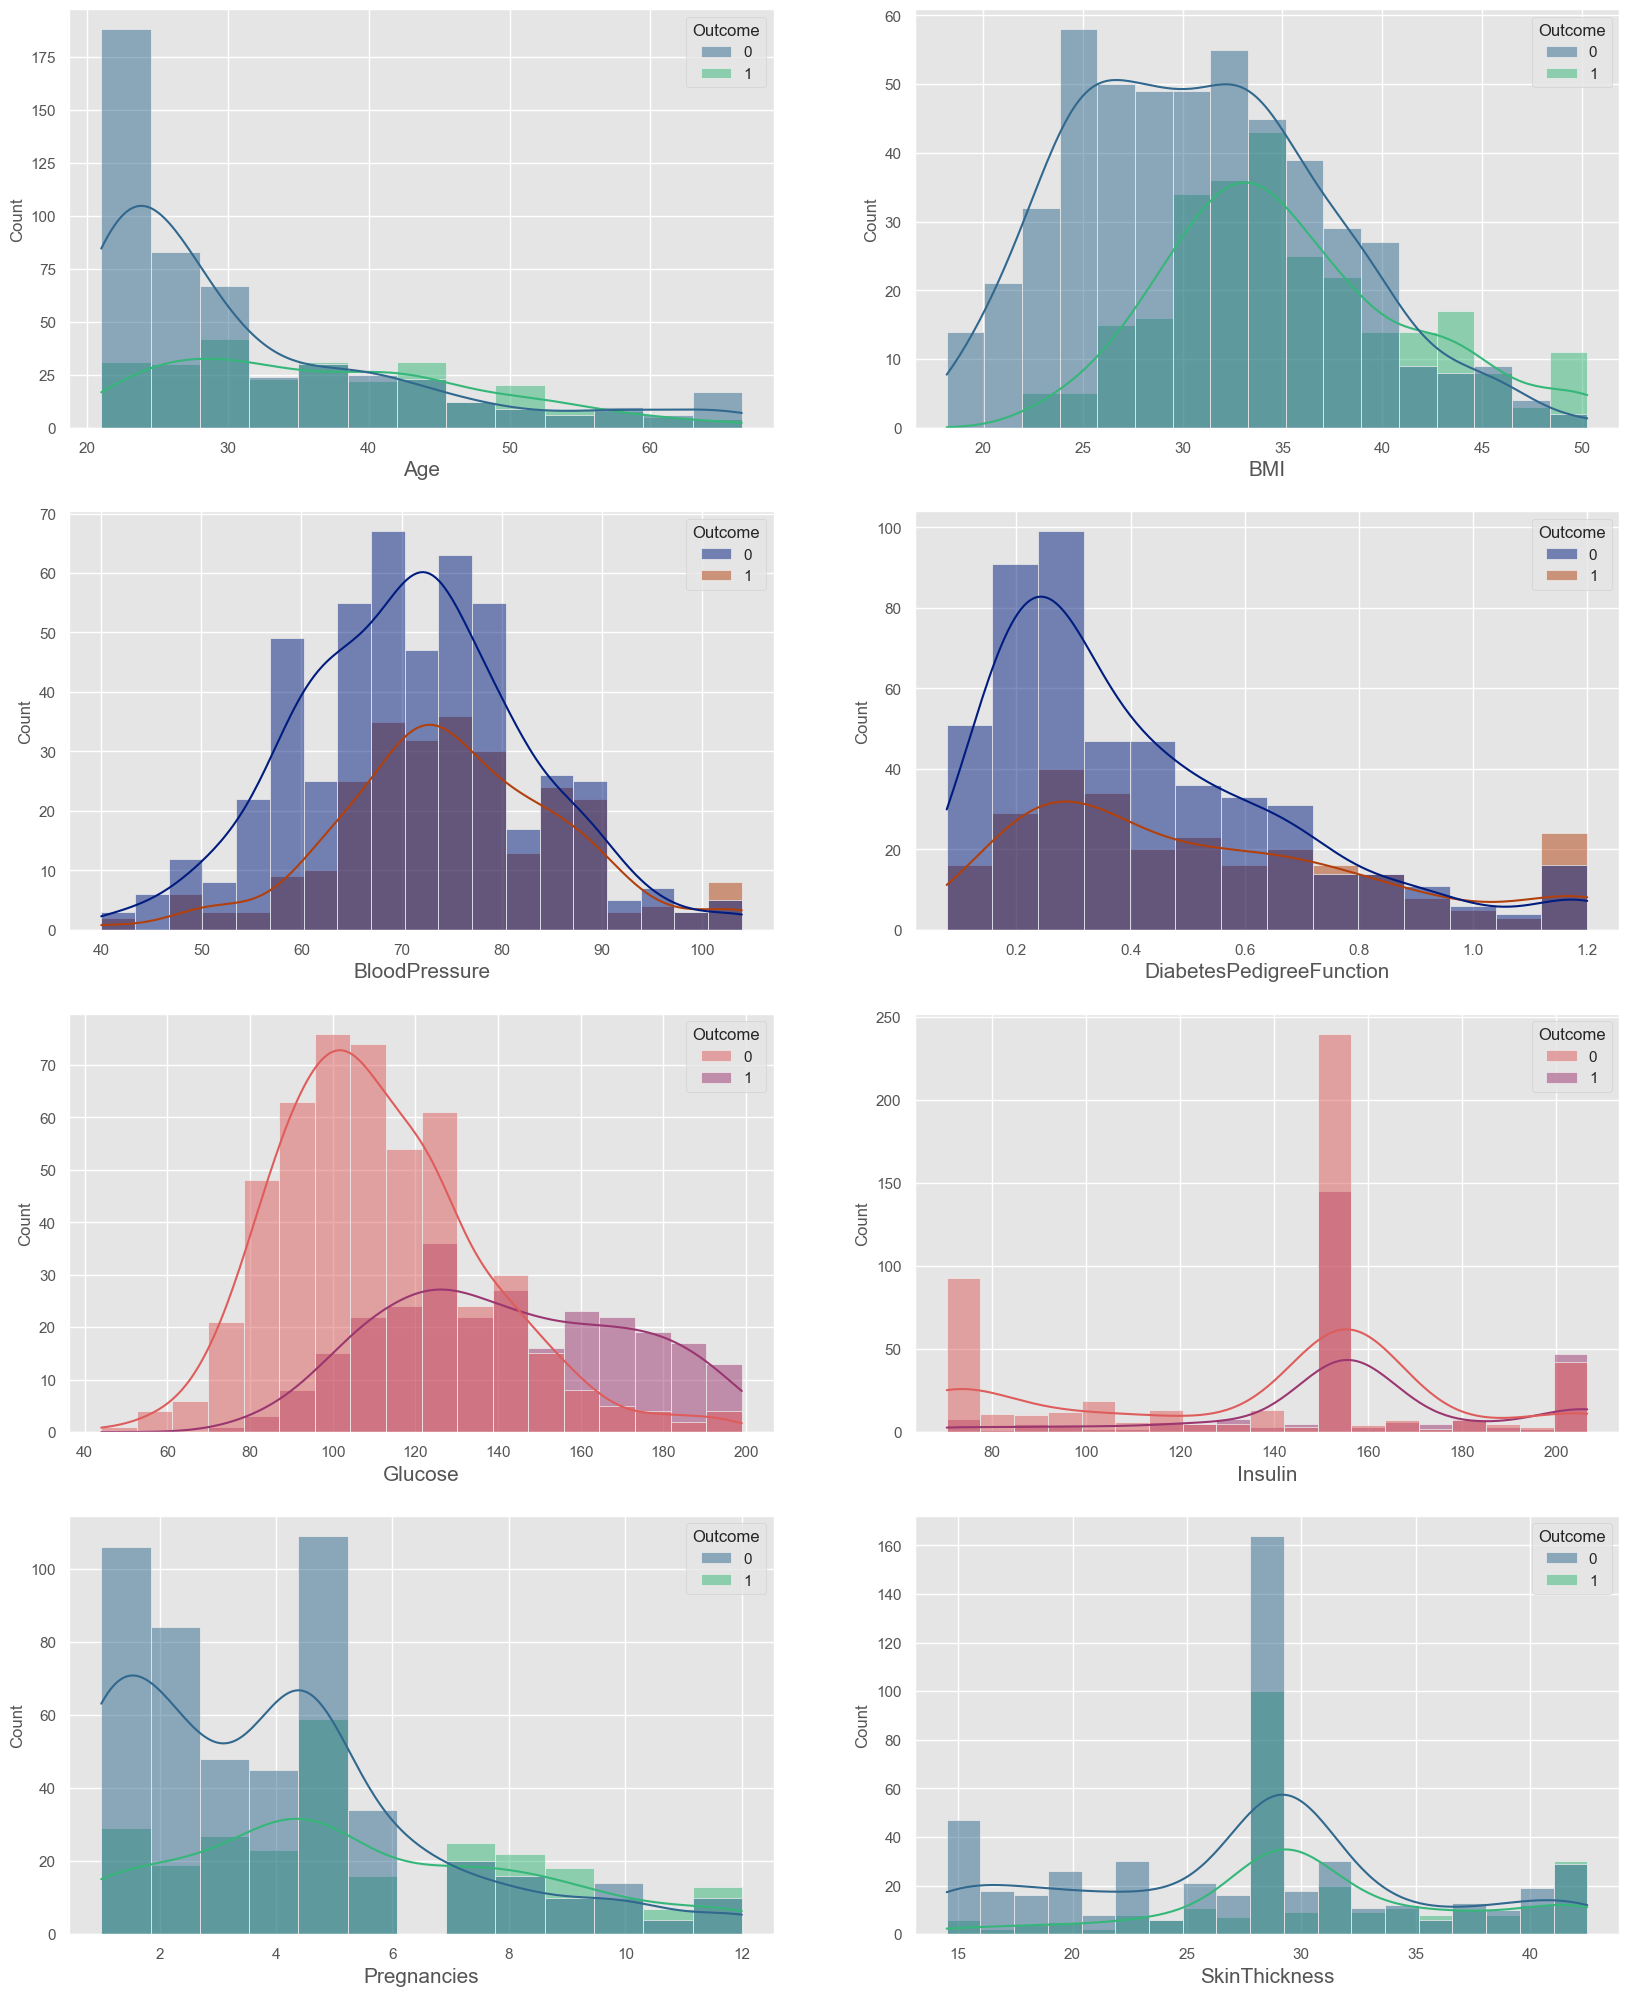

In [35]:
fig, ax = plt.subplots(4, 2, figsize=(20, 25))
plt.style.use('ggplot')

sns.histplot(x = df['Age'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[0, 0])
ax[0,0].set_xlabel('Age', fontsize = 15)

sns.histplot(x = df['BMI'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[0, 1])
ax[0,1].set_xlabel('BMI', fontsize = 15)


sns.histplot(x = df['BloodPressure'], hue = df['Outcome'], palette="dark",kde = True, ax = ax[1, 0])
ax[1,0].set_xlabel('BloodPressure', fontsize = 15)

sns.histplot(x = df['DiabetesPedigreeFunction'], hue = df['Outcome'], palette="dark",kde = True, ax = ax[1, 1])
ax[1,1].set_xlabel('DiabetesPedigreeFunction', fontsize = 15)


sns.histplot(x = df['Glucose'], hue = df['Outcome'], palette="flare",kde = True, ax = ax[2, 0])
ax[2,0].set_xlabel('Glucose', fontsize = 15)

sns.histplot(x = df['Insulin'], hue = df['Outcome'], palette="flare",kde = True, ax = ax[2, 1])
ax[2,1].set_xlabel('Insulin', fontsize = 15)


sns.histplot(x = df['Pregnancies'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[3, 0])
ax[3,0].set_xlabel('Pregnancies', fontsize = 15)

sns.histplot(x = df['SkinThickness'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[3, 1])
ax[3,1].set_xlabel('SkinThickness', fontsize = 15)

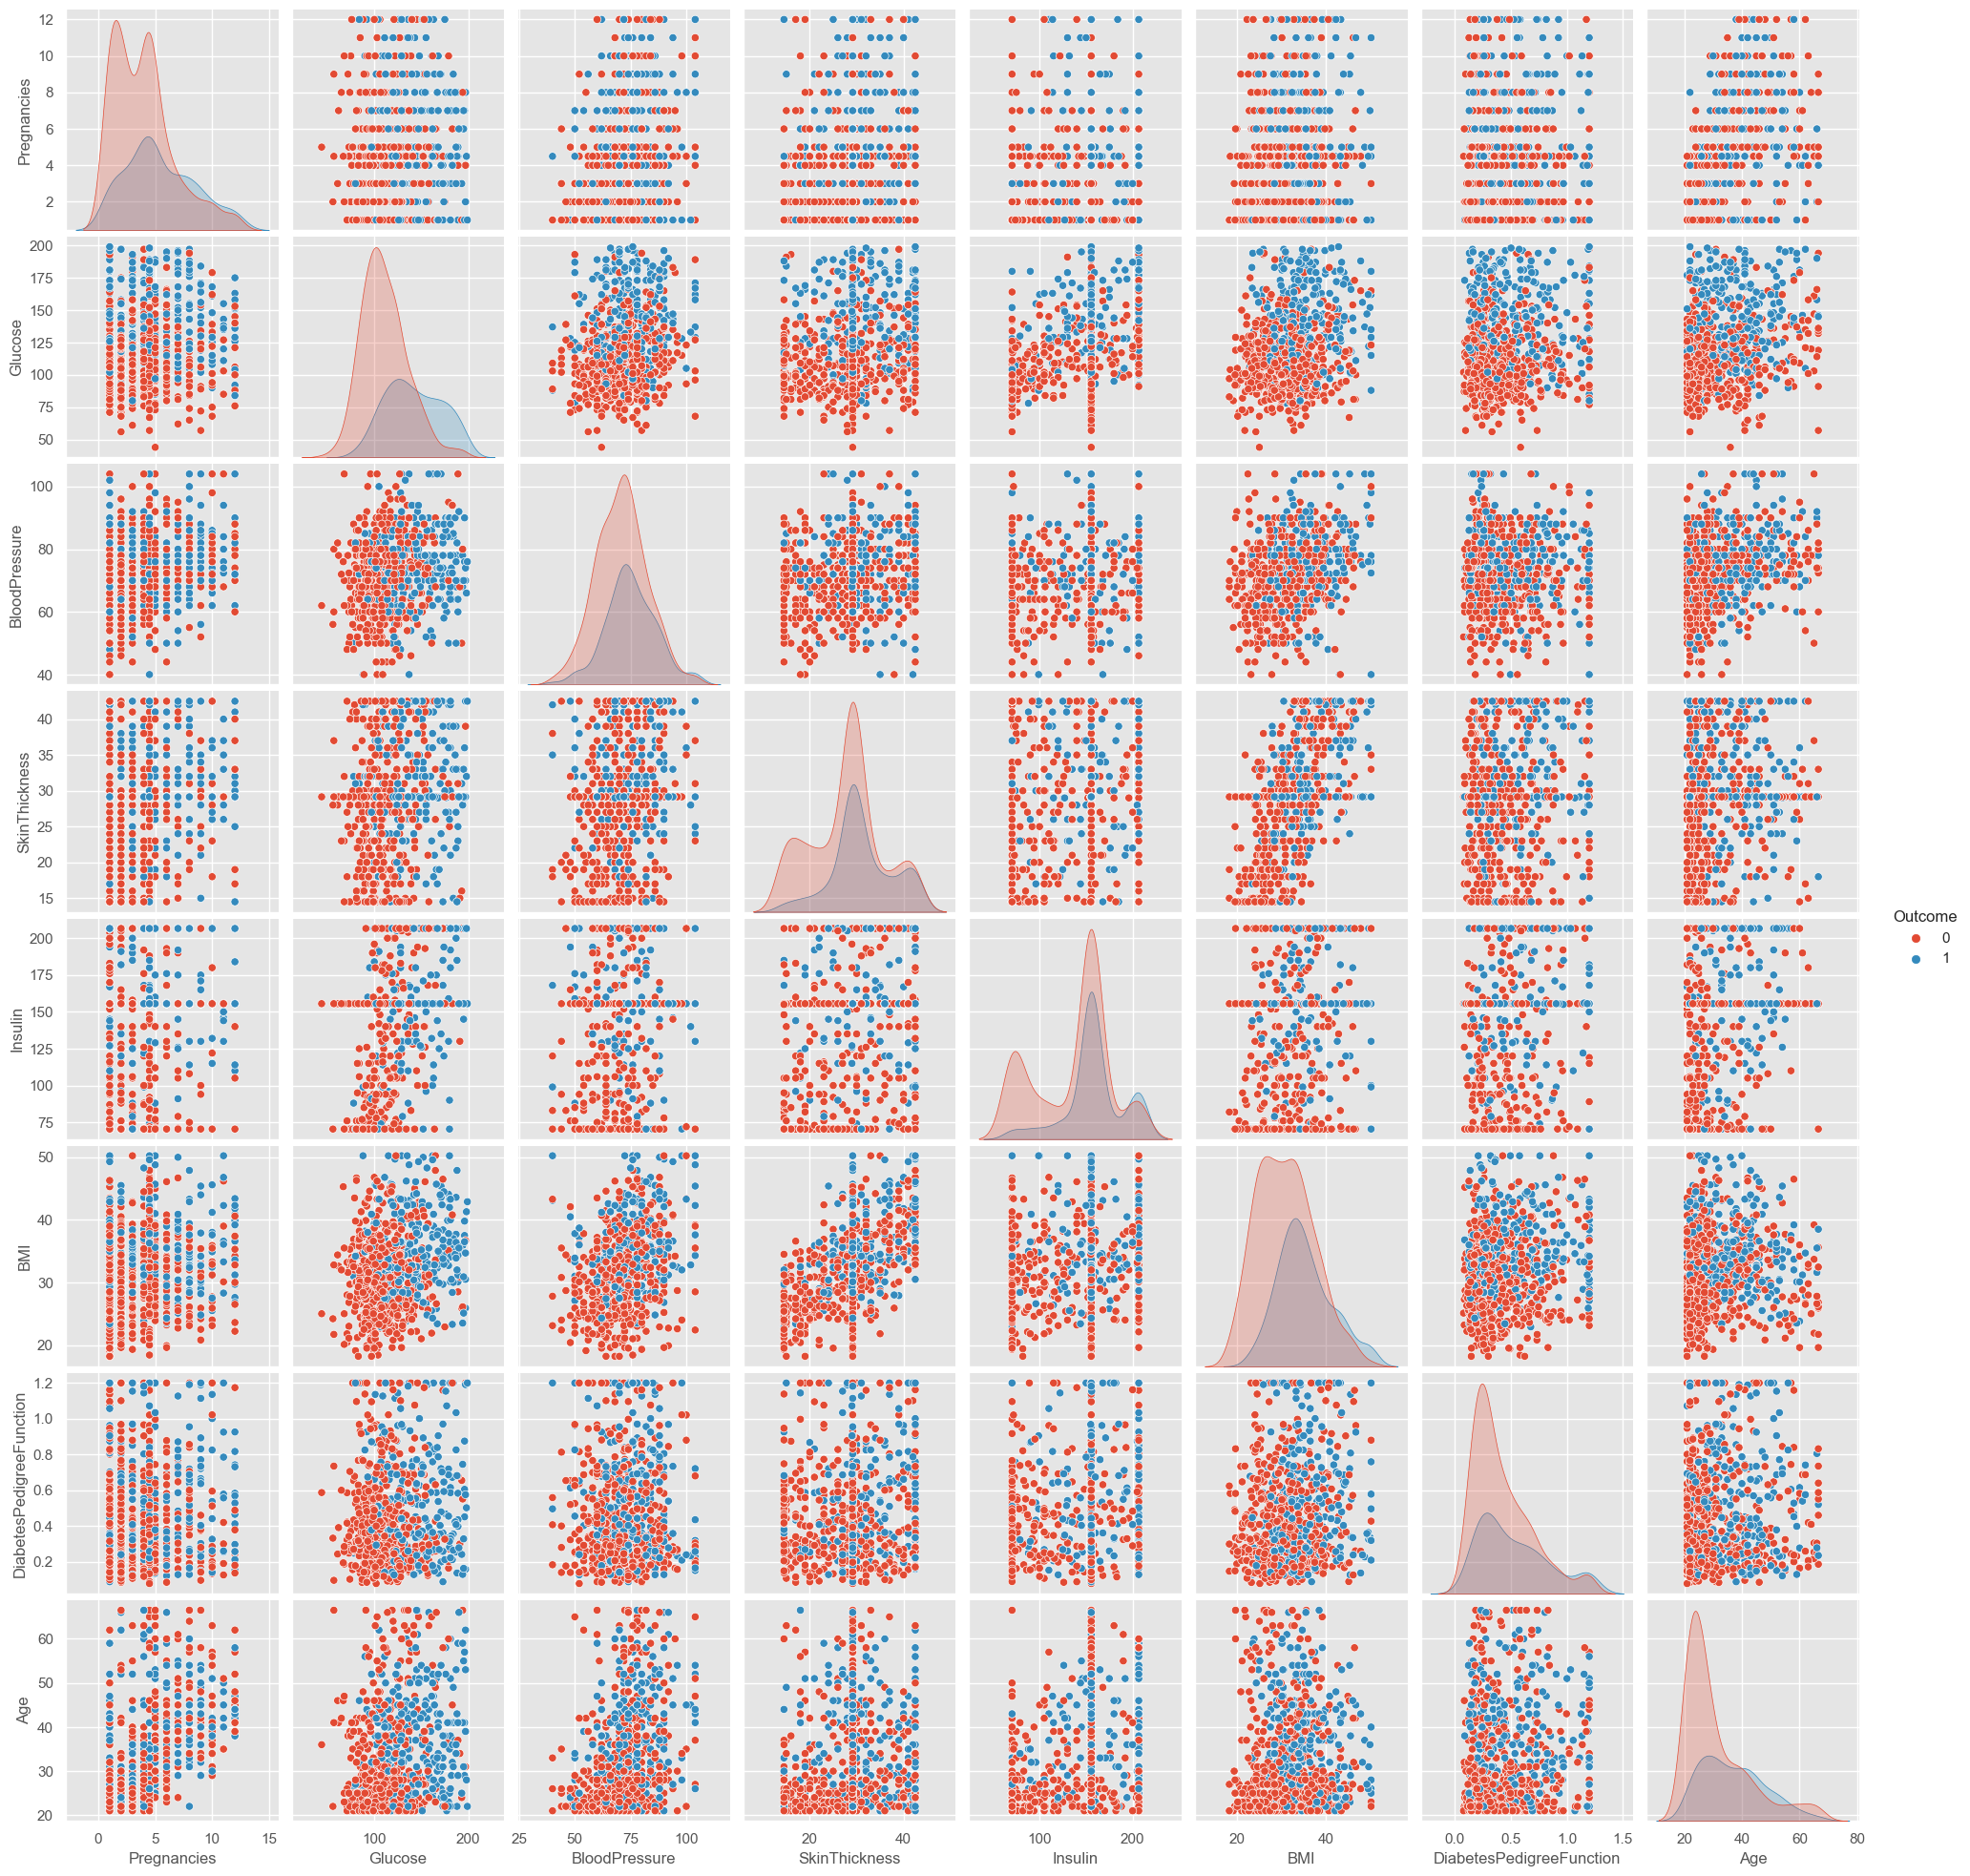

In [36]:
p = sns.pairplot(df, hue="Outcome")

In [37]:
df1 = df.drop('Outcome', axis=1)

<Axes: >

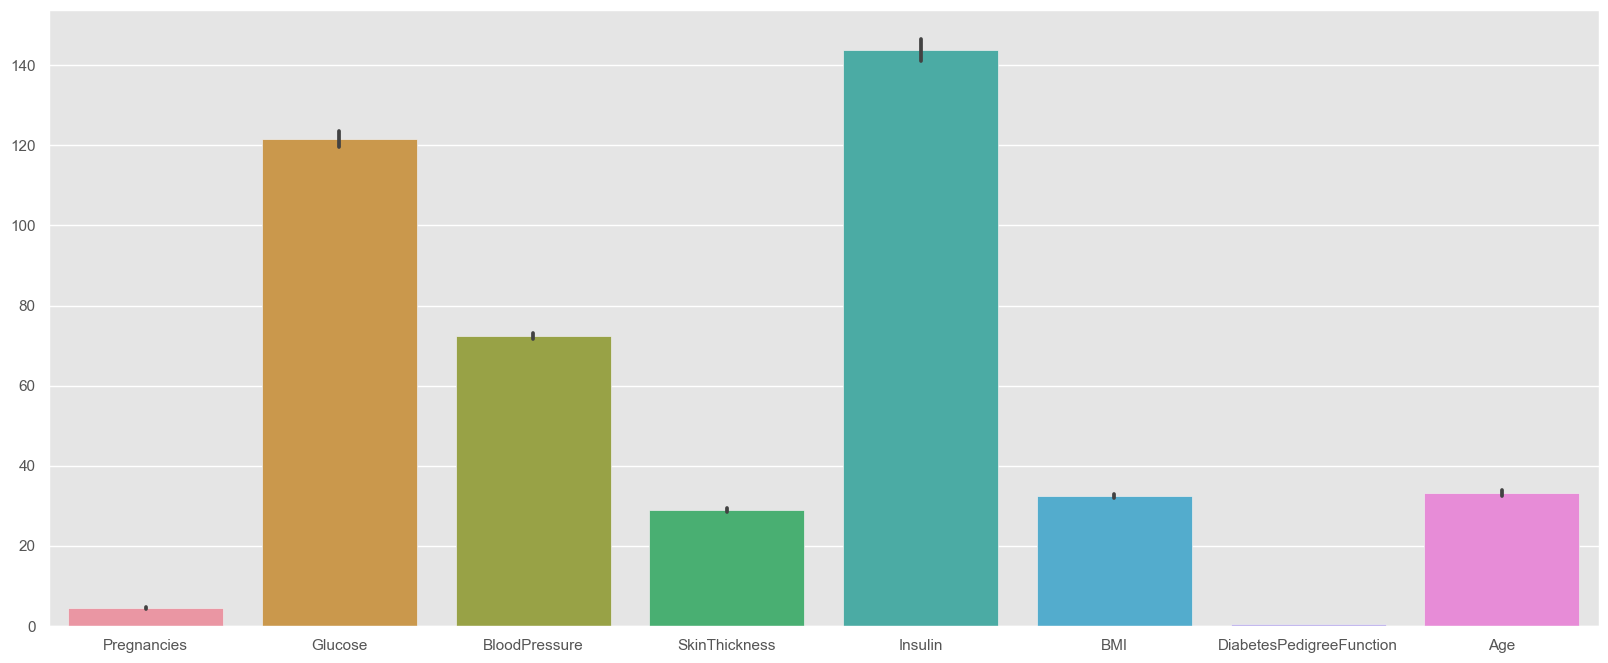

In [38]:
skew_value = df1.skew()
skewness_values = pd.DataFrame({
})
plt.figure(figsize=(20,8))
sns.barplot(data=df1)

### * Correlatig them with each other

In [39]:
df1.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.153632       0.265360       0.159052   
Glucose                      0.153632  1.000000       0.219611       0.181809   
BloodPressure                0.265360  0.219611       1.000000       0.205212   
SkinThickness                0.159052  0.181809       0.205212       1.000000   
Insulin                      0.165251  0.411099       0.140558       0.210714   
BMI                          0.111910  0.233488       0.286554       0.558800   
DiabetesPedigreeFunction    -0.001385  0.118189       0.011915       0.071534   
Age                          0.520838  0.268535       0.332547       0.127244   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.165251  0.111910                 -0.001385   
Glucose                   0.411099  0.233488                  0.118189   
BloodPressure             0.140558  0.286554                  0.011915   
SkinThickness             0.210714  0.558800                  0.071534   
Insulin                   1.000000  0.175615                  0.050695   
BMI                       0.175615  1.000000                  0.138290   
DiabetesPedigreeFunction  0.050695  0.138290                  1.000000   
Age                       0.219945  0.035610                  0.047289   

                               Age  
Pregnancies               0.520838  
Glucose                   0.268535  
BloodPressure             0.332547  
SkinThickness             0.127244  
Insulin                   0.219945  
BMI                       0.035610  
DiabetesPedigreeFunction  0.047289  
Age                       1.000000

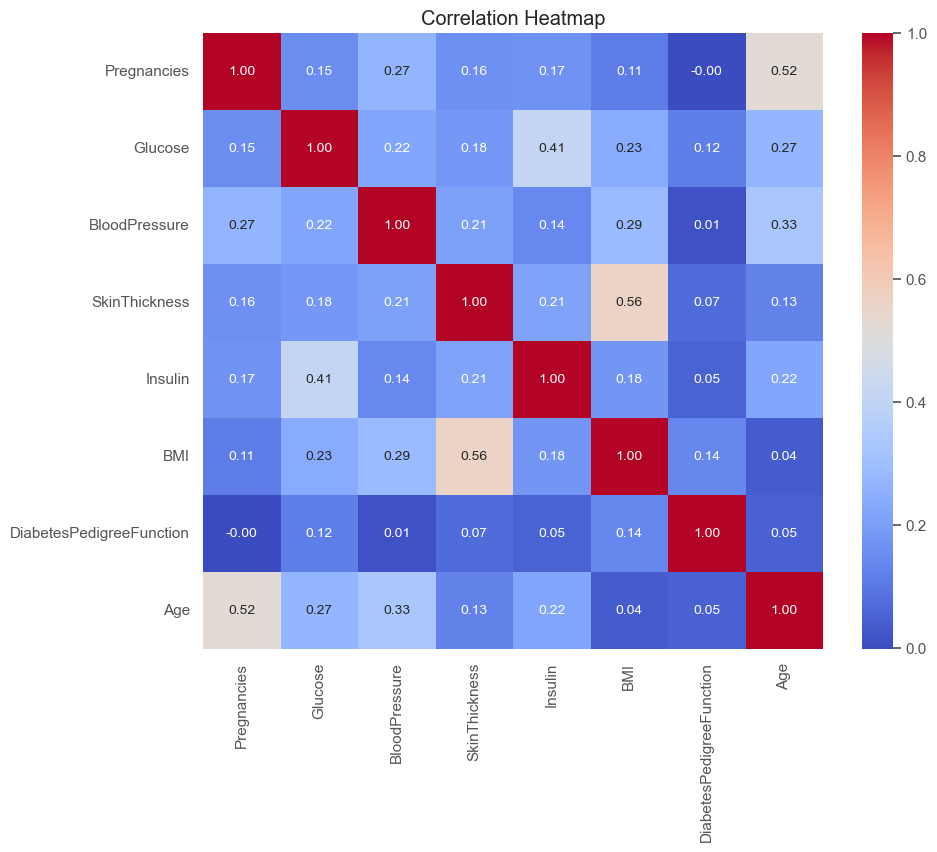

In [40]:
plt.figure(figsize=(10, 8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### * Dropping the Target Variable

In [41]:
x=df.drop('Outcome',axis=1)
x

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0       35.00000  155.548223  33.6   
1       1.000000     85.0           66.0       29.00000  155.548223  26.6   
2       8.000000    183.0           64.0       29.15342  155.548223  23.3   
3       1.000000     89.0           66.0       23.00000   94.000000  28.1   
4       4.494673    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0       42.50000  180.000000  32.9   
764     2.000000    122.0           70.0       27.00000  155.548223  36.8   
765     5.000000    121.0           72.0       23.00000  112.000000  26.2   
766     1.000000    126.0           60.0       29.15342  155.548223  30.1   
767     1.000000     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0  
2                       0.672  32.0  
3                       0.167  21.0  
4                       1.200  33.0  
..                        ...   ...  
763                     0.171  63.0  
764                     0.340  27.0  
765                     0.245  30.0  
766                     0.349  47.0  
767                     0.315  23.0  

[768 rows x 8 columns]

In [42]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### ** Training,Testing and Fitting the Machine Learning Models

### 1) Decsion Tree Classifier

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=42)

NameError: name 'x' is not defined

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [46]:
Y_pred1=model.predict(X_test)

In [47]:
from sklearn import metrics
Accuracy1 = metrics.accuracy_score(Y_test, Y_pred1)
print(Accuracy1)  

0.7056277056277056


In [48]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred1)

<Axes: >

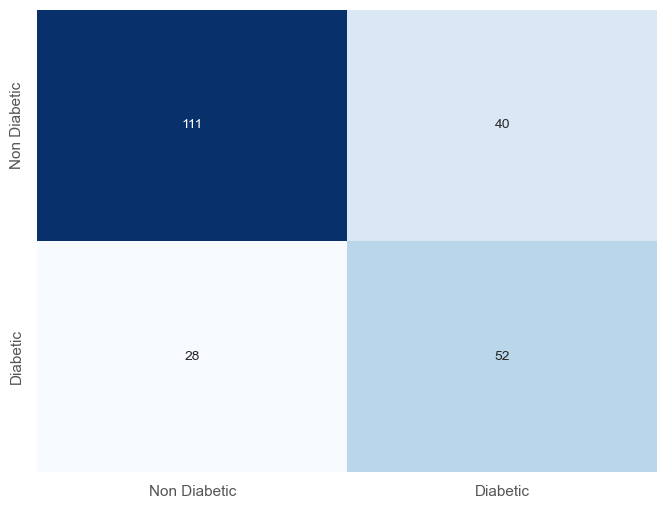

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non Diabetic', 'Diabetic'], yticklabels=['Non Diabetic', 'Diabetic'])

### 2) Support Vector Machine (SVM)

In [50]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [52]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [53]:
y_pred2 = clf.predict(X_test)

In [54]:
X_test['predictions']=y_pred2
X_test['Actual']=y_test
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
668     6.000000     98.0      58.000000       33.00000  190.000000  34.0   
324     2.000000    112.0      75.000000       32.00000  155.548223  35.7   
624     2.000000    108.0      64.000000       29.15342  155.548223  30.8   
690     8.000000    107.0      80.000000       29.15342  155.548223  24.6   
473     7.000000    136.0      90.000000       29.15342  155.548223  29.9   
..           ...      ...            ...            ...         ...   ...   
619     4.494673    119.0      72.405184       29.15342  155.548223  32.4   
198     4.000000    109.0      64.000000       42.50000   99.000000  34.8   
538     4.494673    127.0      80.000000       37.00000  206.620558  36.3   
329     6.000000    105.0      70.000000       32.00000   70.427665  30.8   
302     5.000000     77.0      82.000000       41.00000   70.427665  35.8   

     DiabetesPedigreeFunction   Age  predictions  Actual  
668                     0.430  43.0            0       0  
324                     0.148  21.0            0       0  
624                     0.158  21.0            0       0  
690                     0.856  34.0            0       0  
473                     0.210  50.0            0       0  
..                        ...   ...          ...     ...  
619                     0.141  24.0            0       1  
198                     0.905  26.0            0       1  
538                     0.804  23.0            0       0  
329                     0.122  37.0            0       0  
302                     0.156  35.0            0       0  

[231 rows x 10 columns]

In [55]:
from sklearn.metrics import accuracy_score
Accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", Accuracy2)

Accuracy: 0.7402597402597403


In [56]:
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred2)

<Axes: >

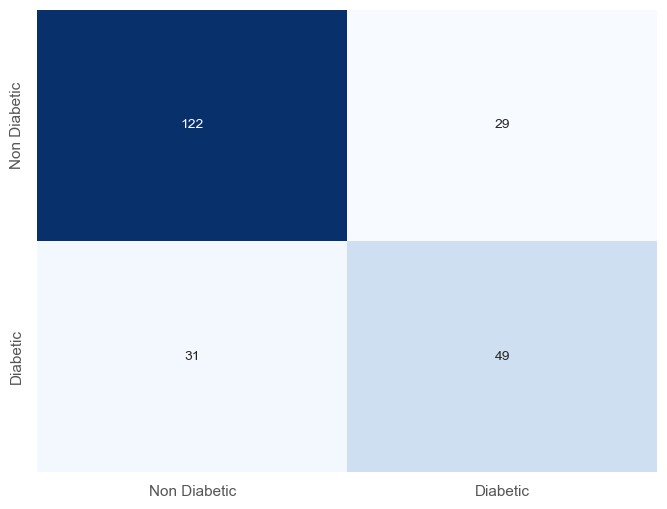

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non Diabetic', 'Diabetic'], yticklabels=['Non Diabetic', 'Diabetic'])

### 3) Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [59]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [60]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
y_pred3 = rf.predict(X_test)

In [62]:
X_test['predictions']=y_pred3
X_test['Actual']=y_test
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
668     6.000000     98.0      58.000000       33.00000  190.000000  34.0   
324     2.000000    112.0      75.000000       32.00000  155.548223  35.7   
624     2.000000    108.0      64.000000       29.15342  155.548223  30.8   
690     8.000000    107.0      80.000000       29.15342  155.548223  24.6   
473     7.000000    136.0      90.000000       29.15342  155.548223  29.9   
..           ...      ...            ...            ...         ...   ...   
619     4.494673    119.0      72.405184       29.15342  155.548223  32.4   
198     4.000000    109.0      64.000000       42.50000   99.000000  34.8   
538     4.494673    127.0      80.000000       37.00000  206.620558  36.3   
329     6.000000    105.0      70.000000       32.00000   70.427665  30.8   
302     5.000000     77.0      82.000000       41.00000   70.427665  35.8   

     DiabetesPedigreeFunction   Age  predictions  Actual  
668                     0.430  43.0            0       0  
324                     0.148  21.0            0       0  
624                     0.158  21.0            0       0  
690                     0.856  34.0            0       0  
473                     0.210  50.0            0       0  
..                        ...   ...          ...     ...  
619                     0.141  24.0            0       1  
198                     0.905  26.0            0       1  
538                     0.804  23.0            0       0  
329                     0.122  37.0            0       0  
302                     0.156  35.0            0       0  

[231 rows x 10 columns]

In [63]:
from sklearn.metrics import accuracy_score
Accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", Accuracy3)

Accuracy: 0.7532467532467533


In [64]:
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred3)

<Axes: >

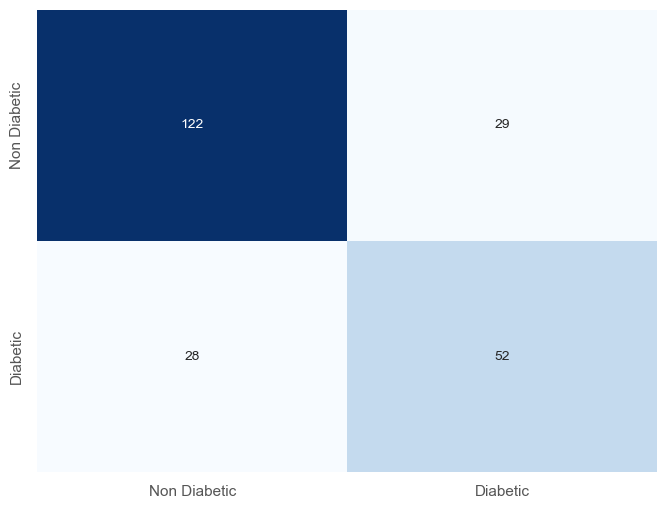

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non Diabetic', 'Diabetic'], yticklabels=['Non Diabetic', 'Diabetic'])

### 4) Ensemble Model

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [68]:
model_1 = svm.SVC(probability=True, random_state=42)
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()

In [69]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

In [71]:
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier

In [72]:
voting = VotingClassifier(estimators=[
    ('svm', model_1),
    ('tree', model_2),
    ('rf', model_3)
], voting='soft') 
# 'hard' for majority voting, 'soft' for probability-based voting

In [73]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=42)),
                             ('tree', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [74]:
y_pred4 = voting.predict(X_test)

In [75]:
X_test['predictions']=y_pred4
X_test['Actual']=y_test
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
257          2.0    114.0           68.0       22.00000  155.548223  28.7   
409          1.0    172.0           68.0       42.50000  206.620558  42.4   
510         12.0     84.0           72.0       31.00000  155.548223  29.7   
153          1.0    153.0           82.0       42.00000  206.620558  40.6   
96           2.0     92.0           62.0       28.00000  155.548223  31.6   
..           ...      ...            ...            ...         ...   ...   
642          6.0    147.0           80.0       29.15342  155.548223  29.5   
190          3.0    111.0           62.0       29.15342  155.548223  22.6   
163          2.0    100.0           64.0       23.00000  155.548223  29.7   
278          5.0    114.0           74.0       29.15342  155.548223  24.9   
130          4.0    173.0           70.0       14.50000  168.000000  29.7   

     DiabetesPedigreeFunction   Age  predictions  Actual  
257                     0.092  25.0            0       0  
409                     0.702  28.0            1       1  
510                     0.297  46.0            0       1  
153                     0.687  23.0            0       0  
96                      0.130  24.0            0       0  
..                        ...   ...          ...     ...  
642                     0.178  50.0            0       1  
190                     0.142  21.0            0       0  
163                     0.368  21.0            0       0  
278                     0.744  57.0            0       0  
130                     0.361  33.0            1       1  

[231 rows x 10 columns]

In [76]:
from sklearn.metrics import accuracy_score
Accuracy4 = accuracy_score(y_test, y_pred4)
print(f'Ensemble Accuracy: {Accuracy4:.2f}')

Ensemble Accuracy: 0.77


In [77]:
confusion_matrix3 = metrics.confusion_matrix(y_test, y_pred4)

<Axes: >

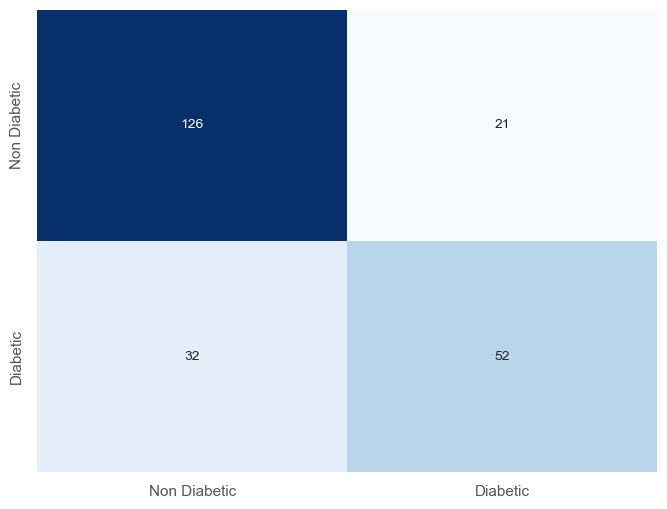

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non Diabetic', 'Diabetic'], yticklabels=['Non Diabetic', 'Diabetic'])

## Accuracy of each ML Model

In [79]:
models = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'SVM', 'Random Forest Classifier', 'Ensemble'],
    'Score': [100*round(Accuracy1,4), 100*round(Accuracy2,4), 100*round(Accuracy3,4), 100*round(Accuracy4,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
3                  Ensemble  77.06
2  Random Forest Classifier  75.32
1                       SVM  74.03
0  Decision Tree Classifier  70.56

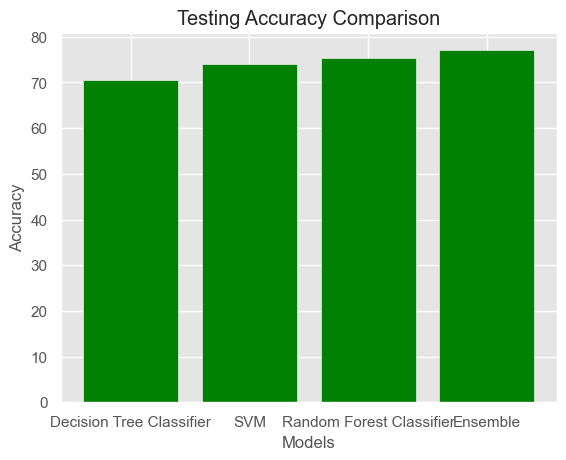

In [80]:
models =  ['Decision Tree Classifier', 'SVM', 'Random Forest Classifier', 'Ensemble']
accuracy = [100*round(Accuracy1,4), 100*round(Accuracy2,4), 100*round(Accuracy3,4), 100*round(Accuracy4,4)]
plt.bar(models, accuracy, color='green')
plt.title('Testing Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv(r"C:\Users\david\OneDrive\Desktop\diabetes.csv")

# Handle missing values
df.replace(0, np.NaN, inplace=True)
df.fillna(df.mean(), inplace=True)

# Split data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
models = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'SVM', 'Random Forest Classifier', 'Ensemble'],
    'Score': [100*round(Accuracy1,4), 100*round(Accuracy2,4), 100*round(Accuracy3,4), 100*round(Accuracy4,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
3                  Ensemble  77.06
2  Random Forest Classifier  75.32
1                       SVM  74.03
0  Decision Tree Classifier  70.56